## MPG 결정트리로 특성 중요도 파악하여 연비 예측 모델 생성(중요도 높은 특성만 활용)

 - 테스트 모델: 선형회귀, 릿지, 라쏘, 결정 트리 회귀
 - 평가 지표 확인: MAE, MRSE, R^2


In [1]:
import pandas as pd

# TSV 파일 읽기
df = pd.read_csv('./auto_mpg/auto-mpg.data', delimiter='\t', header=None)

# 데이터 확인
print(df.head())

                                                   0  \
0  18.0   8   307.0      130.0      3504.      12...   
1  15.0   8   350.0      165.0      3693.      11...   
2  18.0   8   318.0      150.0      3436.      11...   
3  16.0   8   304.0      150.0      3433.      12...   
4  17.0   8   302.0      140.0      3449.      10...   

                           1  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  


In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv('./auto_mpg/auto-mpg.data', names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)


dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [4]:
dataset.dropna(inplace=True)
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
import numpy as np

X = dataset[['Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']].astype('int')
y = dataset['MPG'].astype('int').to_numpy()

In [6]:
y

array([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 24, 22, 18,
       21, 27, 26, 25, 24, 25, 26, 21, 10, 10, 11,  9, 27, 28, 25, 19, 16,
       17, 19, 18, 14, 14, 14, 14, 12, 13, 13, 18, 22, 19, 18, 23, 28, 30,
       30, 31, 35, 27, 26, 24, 25, 23, 20, 21, 13, 14, 15, 14, 17, 11, 13,
       12, 13, 19, 15, 13, 13, 14, 18, 22, 21, 26, 22, 28, 23, 28, 27, 13,
       14, 13, 14, 15, 12, 13, 13, 14, 13, 12, 13, 18, 16, 18, 18, 23, 26,
       11, 12, 13, 12, 18, 20, 21, 22, 18, 19, 21, 26, 15, 16, 29, 24, 20,
       19, 15, 24, 20, 11, 20, 19, 15, 31, 26, 32, 25, 16, 16, 18, 16, 13,
       14, 14, 14, 29, 26, 26, 31, 32, 28, 24, 26, 24, 26, 31, 19, 18, 15,
       15, 16, 15, 16, 14, 17, 16, 15, 18, 21, 20, 13, 29, 23, 20, 23, 24,
       25, 24, 18, 29, 19, 23, 23, 22, 25, 33, 28, 25, 25, 26, 27, 17, 16,
       15, 14, 22, 22, 24, 22, 29, 24, 29, 33, 20, 18, 18, 17, 29, 32, 28,
       26, 20, 13, 19, 19, 16, 16, 13, 13, 13, 31, 30, 36, 25, 33, 17, 17,
       15, 15, 17, 20, 19

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

print(X_train.shape, X_test.shape)

(294, 7) (98, 7)


## 선형 회귀

In [8]:
# 선형 회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 객체 생성
lr = LinearRegression()

# 선형 회귀 모델 훈련
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8211244580048237
0.7965753494965195


In [9]:
print(X_train[:1])
print(X_test[:1])

     Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
267          4           134          95    2560            14          78   

     Origin  
267       3  
    Cylinders  Displacement  Horsepower  Weight  Acceleration  Model Year  \
79          4            96          69    2189            18          72   

    Origin  
79       2  


In [10]:
# 계수, 기울기, 가중치, coef라고 불리는 a(coefficient)와 절편 b(intercept_)
# 가중치는 계수와 절편 모두를 의미하기도 함
print(lr.coef_, lr.intercept_)

[-0.44113549  0.01555917 -0.02362668 -0.00597995  0.01965833  0.7254707
  1.62412918] -14.9598274646935


In [11]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train) # 훈련 데이터로 한번만 fit진행. 테스트 데이터는 fit이 아닌 transform을 적용

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [12]:
print(train_scaled[:1])
print(test_scaled[:1])

[[-0.85952153 -0.58847646 -0.24582607 -0.49007627 -0.40235395  0.51134
   1.74963553]]
[[-0.85952153 -0.95218851 -0.9205458  -0.93156505  1.00588488 -1.13465226
   0.52489066]]


In [13]:
# 선형 회귀 모델 사용
from sklearn.linear_model import LinearRegression

# 객체 생성
lr_scaled = LinearRegression()

# 선형 회귀 모델 훈련
lr_scaled.fit(train_scaled, y_train)

print(lr_scaled.score(train_scaled, y_train))
print(lr_scaled.score(test_scaled, y_test))

0.8211244580048238
0.796575349496519


## 릿지 회귀

In [14]:
train_scaled[0]

array([-0.85952153, -0.58847646, -0.24582607, -0.49007627, -0.40235395,
        0.51134   ,  1.74963553])

In [15]:
# 스케일링된 데이터셋으로 릿지회귀 확인
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.8210518592977498
0.7952247484938677


In [16]:
rw = ridge.coef_
print("rw :::: ", rw)
rb = ridge.intercept_
print("rb :::: ", rb)

print('모델이 예측한 값:', ridge.predict([train_scaled[0]]))

rw ::::  [-0.68200374  1.36861083 -0.93301802 -4.84295746  0.02454866  2.62241138
  1.31131936]
rb ::::  23.51360544217687
모델이 예측한 값: [29.52258326]


### 적당한 alpha값을 찾는 방법
- alpha값에 대한 $R^2$ 값의 그래프 그려보기
- 훈련 데이터셋과 테스트 데이터 셋의 점수가 가장 가까운 지점이 최적 alpha값

In [17]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001,0.01, 0.1, 1, 10, 100, 1000] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

In [18]:
train_score

[0.8211244579201487,
 0.8211244495497282,
 0.8211236247354805,
 0.8210518592977498,
 0.8182355839148902,
 0.7957591413954311,
 0.6239241673734672]

In [19]:
test_score

[0.7965739733680982,
 0.7965615899272345,
 0.7964379323938021,
 0.7952247484938677,
 0.7863184450088991,
 0.7665879698397592,
 0.628315607645364]

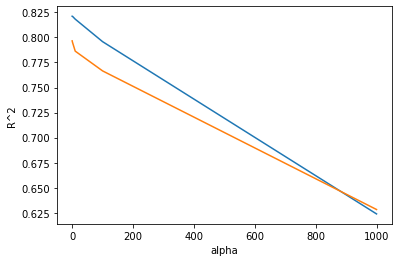

In [20]:
# 그래프 그리기
plt.plot(alpha_list, train_score) # alpha리스트의 값이 작으므로 그래프 왼쪽이 너무 촘촘함
plt.plot(alpha_list, test_score)

plt.xlabel('alpha')
plt.ylabel('R^2')

plt.show()

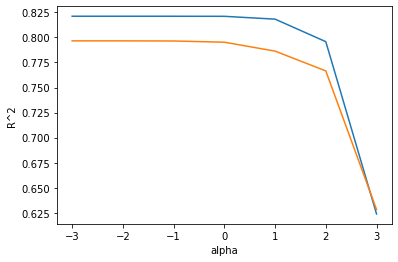

In [21]:
plt.plot(np.log10(alpha_list), train_score) # 로그함수 적용(0.001은 -3, 0.01은 -2와 같이 만듦)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [22]:
ridge = Ridge(alpha=100)
ridge.fit(train_scaled, y_train)

print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.7957591413954311
0.7665879698397592


## 라쏘 회귀 확인

In [23]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.7907963198887975
0.8013669598700948


In [24]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10] # 적용해볼 alpha값 리스트
for alpha in alpha_list:
    # 라쏘 모델을 생성
    lasso = Lasso(alpha=alpha)
    # 라쏘 모델을 훈련
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

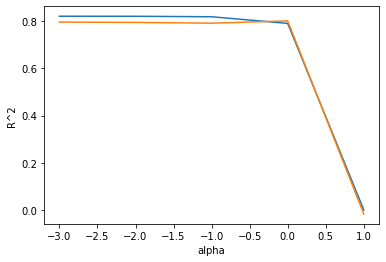

In [25]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [26]:
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.0
-0.016877168792370334


In [27]:
lasso = Lasso(alpha=0.5)
lasso.fit(train_scaled, y_train)

print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.8121558528182125
0.8028574022552714


In [28]:
lw = lasso.coef_
print(lw)
lb = lasso.intercept_
print(lb)

print('모델이 예측한 값:', lasso.predict([train_scaled[0]]))

[-0.         -0.         -0.5138789  -4.45676527  0.          2.25272691
  0.84709343]
23.51360544217687
모델이 예측한 값: [28.45809929]


## 결정트리(Decision Tree)

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9965986394557823
0.16326530612244897


In [30]:
y_pred = dt.predict(X_test)
print(y_pred)

[30 23 33 30 29 32 12 29 18 31 15 23 16 32 20 20 20 32 27 29 23 43 37 17
 31 28 19 17 29 23 15 20 18 31 14 37 13 30 16 13 16 28 36 26 16 11 18 41
 23 29 14 26 21 29 22 15 18 19 24 26 11 20 28 22 27 27 27 29 17 14 23 14
 21 27 19 30 14 17 27 19 28 17 14 31 16 31 23 22 15 15 26 36 34 29 19 20
 19 13]


In [31]:
y_test

array([26, 21, 36, 26, 27, 28, 13, 26, 19, 29, 15, 19, 16, 29, 16, 28, 20,
       32, 27, 35, 22, 44, 34, 18, 26, 26, 21, 16, 26, 22, 15, 19, 19, 31,
       13, 38, 14, 25, 13, 10, 13, 24, 36, 26, 14, 13, 19, 37, 21, 29, 14,
       24, 28, 36, 22, 16, 20, 20, 25, 25, 12, 22, 26, 23, 21, 25, 25, 29,
       19, 15, 22, 13, 22, 18, 17, 28, 15, 16, 27, 18, 25, 18, 15, 39, 15,
       29, 25, 21, 17, 16, 22, 30, 30, 31, 19, 16, 18, 13])

In [32]:
y_pred == y_test

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True])

In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [34]:
mse

8.387755102040817

## 교차검증

In [35]:
X_train_sub, X_test_valid, y_train_sub, y_test_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [36]:
X_train_sub.shape, X_test_valid.shape

((235, 7), (59, 7))

In [37]:
X_test_valid.shape, y_test_valid.shape

((59, 7), (59,))

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_sub, y_train_sub)

print(dt.score(X_train_sub, y_train_sub))
print(dt.score(X_test_valid, y_test_valid))

0.9957446808510638
0.11864406779661017


In [39]:
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)
scores

C:\Users\CDL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'fit_time': array([0.        , 0.        , 0.00160408, 0.        , 0.        ]),
 'score_time': array([0.      , 0.013587, 0.      , 0.      , 0.      ]),
 'test_score': array([0.13559322, 0.18644068, 0.13559322, 0.18644068, 0.0862069 ])}

In [40]:
import numpy as np

np.mean(scores['test_score'])

0.14605493863237876

In [41]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, X_train, y_train, cv=StratifiedKFold())
np.mean(scores['test_score'])

C:\Users\CDL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.14605493863237876

In [42]:
from sklearn.model_selection import StratifiedKFold

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_validate(dt, X_train, y_train, cv=splitter)
np.mean(scores['test_score'])

C:\Users\CDL\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.15011494252873564